# Scratch Artificial Neural Network

In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import sys
sys.dont_write_bytecode = True

# Import libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Import custom modules
from ArtificialNeuralNetwork import ArtificialNeuralNetwork
from Layer import Layer, OutputLayer, InputLayer
from Function import ActivationFunction, LossFunction
from enums import InitializerType, RegularizationType

# Pipeline for testing MNIST dataset

In [57]:
input_size = 784
hidden_layers = 5
hidden_size = 128
output_size = 10
learning_rate = 0.1
param_1 = 0
param_2 = 0.5
batch_size = 64


In [31]:
# Load MNIST dataset using fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0
y = y.astype(int)


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

In [115]:
ann = ArtificialNeuralNetwork(
        123,
        InputLayer(input_size=input_size),
        Layer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=input_size,
            num_neurons=20,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.prelu,
            alpha=0.2,
            layer_name=f"Hidden Layer 0",
        ),
        *[Layer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=20,
            num_neurons=20,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.prelu,
            alpha=0.2,
            layer_name=f"Hidden Layer {_}",
        ) for _ in range(hidden_layers - 1)],
        OutputLayer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=20,
            num_neurons=output_size,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.softmax,
            loss_funct=LossFunction.categorical_cross_entropy,
            layer_name="Output Layer"
        )
    )

In [116]:
ann.train(
        x=X_train,
        y=y_train,
        loss_function=LossFunction.categorical_cross_entropy,
        lr=0.01,
        epochs=500,
        batch_size=batch_size,
        verbose=True,
        validation_data=(X_test, y_test),
    )

Training: 100%|██████████| 500/500 [03:58<00:00,  2.10it/s, Loss: 0.0045, Val Loss: 0.6980]

Total training time: 226.88s


([6.665586423902994,
  2.9125894502744956,
  2.3129470588759706,
  1.992695859347667,
  1.7896713046378654,
  1.640861836483459,
  1.5194680853135807,
  1.4372028097750384,
  1.363296010135666,
  1.303664748641042,
  1.2424418061416966,
  1.1896278452063322,
  1.150229154162006,
  1.109785312569799,
  1.0668801213687695,
  1.0428298995704,
  1.0065079762020868,
  0.9766852229259999,
  0.9605036687113627,
  0.9431931221022707,
  0.9101227022159195,
  0.8954455184274744,
  0.8767764201766418,
  0.858778863460093,
  0.835769428582037,
  0.819627749014926,
  0.8092868887022137,
  0.7935507036075754,
  0.7785886255083877,
  0.7717663452840743,
  0.7518663777574358,
  0.7470072184409206,
  0.7296577071701629,
  0.7267639378136126,
  0.7096092512300964,
  0.7027685528811244,
  0.6926140832398252,
  0.6856715345290655,
  0.6796765031191712,
  0.6655905807687156,
  0.6575652533794814,
  0.6497550341912197,
  0.6476897990212929,
  0.6366147086981666,
  0.6254469532647079,
  0.6225285813669663,
 

In [117]:
from sklearn.metrics import f1_score

y_pred = ann.predict(X_test)
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro')}")

F1 Score: 0.9571853262380798


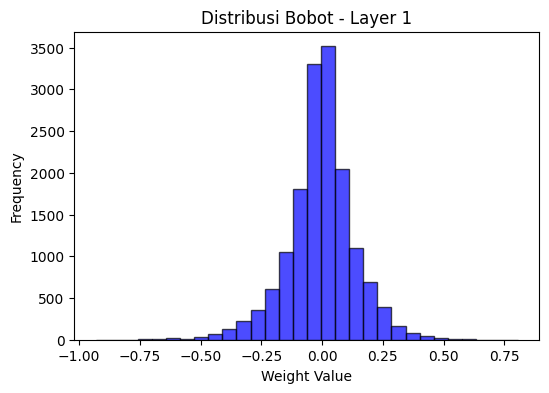

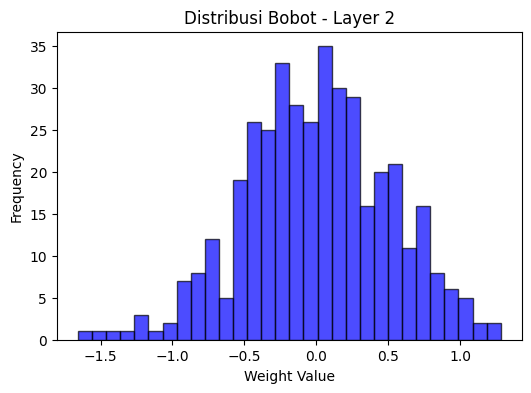

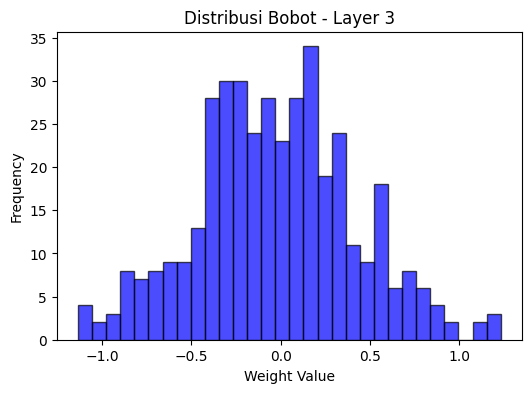

In [35]:
ann.visualize_weight_distribution((1,2,3))

In [36]:
ann.save("ann_model.pkl")

Model saved to models/ann_model.pkl


In [37]:
new_model = ArtificialNeuralNetwork()

In [38]:
new_model.load("ann_model.pkl")

Model loaded from models/ann_model.pkl


In [39]:
new_model.evaluate(X_test, y_test)

np.float64(0.962)

In [113]:
# Compare with MLP

from sklearn.neural_network import MLPClassifier

# Comparison with scikit-learn MLP (using ReLU instead of PReLU)
model = MLPClassifier(
    hidden_layer_sizes=(20, 20, 20, 20, 20),
    activation='relu',
    solver='sgd',
    max_iter=50,
    batch_size=batch_size,
    random_state=123,
    verbose=True,
    learning_rate_init=0.01,
    learning_rate='constant',
    tol=0.0
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("F1 Score: ", f1_score(y_test, y_pred, average='macro'))

Iteration 1, loss = 0.59433002
Iteration 2, loss = 0.34917469
Iteration 3, loss = 0.30381866
Iteration 4, loss = 0.29002085
Iteration 5, loss = 0.27077085
Iteration 6, loss = 0.25806391
Iteration 7, loss = 0.33357616
Iteration 8, loss = 0.41753496
Iteration 9, loss = 1.28481867
Iteration 10, loss = 2.34782590
Iteration 11, loss = 2.34791659
Iteration 12, loss = 2.34777422
Iteration 13, loss = 2.34805189
Iteration 14, loss = 2.34743824
Iteration 15, loss = 2.34742716
Iteration 16, loss = 2.34720819
Iteration 17, loss = 2.34711327
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.
F1 Score:  0.02105595794782319
